In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
import scipy.stats as stats
from matplotlib_venn import venn2_unweighted
from pysankey import sankey
from matplotlib import rcParams

# Load Data

In [3]:
df= pd.read_csv('../data/240_B.txt',sep="\t") 
df.head()

,PMC_ID,PMC_Year,Journal,IF,Article Title,Type of paper,Secondary analysis,Data availability statement (yes/no),Data availability with explaination(yes/no),Data availability (yes/no),...,"If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations,Gender of the PI,"Experience of PI/ Last author (Check their profile or webpage to see whether they are an associate/ assistant/ professor/ professor emiretus, etc)",PI/ last author's training background - CS/ Bioinformatics/ Other,PI (last author's) education level - PhD/PostDoc/ Master's etc,First author's education level,First author's training background (CS/ Bioinformatics/ Other)
0,PMC6686906,2019,Nat_Genet,28.0,Accurate estimation of SNP-heritability from b...,Research article,hybrid,yes,yes for secondary/ no for primary,no,...,NaN,NaN,yes,47,Male,Associate Professor,"CS, Bioinformatics",Postdoc,MS,Bioinformatics
1,PMC7610512,2020,Nat_Genet,38.3,Regulation of single-cell genome organization ...,Research article,Hybrid,yes,yes for secondary/Available upon request for p...,no,...,NaN,NaN,yes,39,Male,Research Director,Other,Postdoc,Postdoc,"Other, Genetics"
2,PMC7343611,2020,Nat_Genet,38.3,Lymph node metastases develop through a wider ...,Research article,Hybrid,yes,yes,yes,...,notebook,multiple,yes,31,Female,Assistant Professor,Other,Phd,Postdoc,CS
3,PMC6767648,2019,Genome_Med,11.0,Identifying Crohn’s disease signal from variom...,Research article,hybrid,yes,yes for secondary/ Available upon request for ...,no,...,NaN,NaN,yes,58,Female,Associate Professor,Bioinformatics,Phd,Phd,Bioinformatics
4,PMC6862797,2019,Genome_Biol,9.5,Population-level analysis reveals the widespre...,Research article,no,yes,yes,yes,...,NaN,NaN,no,74,Male,Professor,Other,Phd,Masters,Other


# Data cleanup

In [4]:
#github cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'github', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'GitHub + Zenodo', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Zenodo/GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'

#Bitbucket cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'BitBucket', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Bitbucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (BitBucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'

#Sourceforge cleanup 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'

# Website Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website), GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website, Github'

# Supplementary Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others(Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'

# No,Nan merge 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'no', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'nan', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'

#gitlab fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'gitlab', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitLab'

#downloadable file fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'downloadable file', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Downloadable File'


#GEO Fix 
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'Geo', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'GEO'

#Other Fix for 'If Data availability = yes, where do they share data? (SRA/GEO/other)'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'Other'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'SRA,other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'SRA,Other'

#cleanup secondary analysis column 
df.loc[df['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'


# Figure 1 

## Figure 1a

### Old Figure

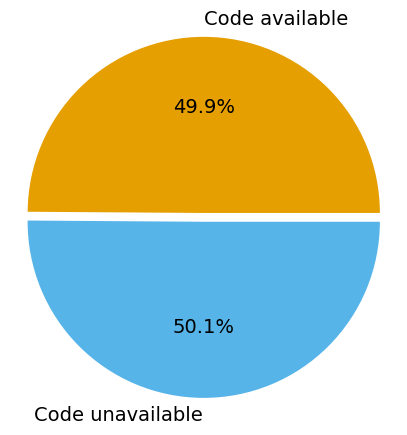

In [ ]:
labels = 'Code available', 'Code unavailable'
sizes = [226, 227]
explode = (0.05, 0) 
colors = ['#E69F00', '#56B4E9']
textprops = {"fontsize":14}

#Plot
#plt.rcParams['font.size']=14
fig3, ax1 = plt.subplots(figsize = (5,5))
#plt.title("Code availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=360, textprops = textprops)
ax1.axis('equal')

sns.despine()
#plt.savefig(r'figure3.jpg', bbox_inches='tight', dpi=600)
plt.show()

### New Figure

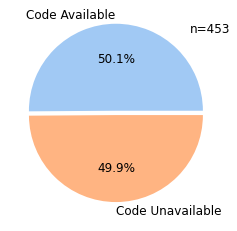

In [4]:
rcParams['font.family'] = 'sans-serif'
colors=sns.color_palette('pastel')
explode = (0.05, 0) 
textprops = {"fontsize":12}
plt.pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code Available','Code Unavailable'], colors=colors, autopct='%1.1f%%',textprops = textprops)
plt.text(0.85, 0.95, "n=453", fontsize=12)
sns.despine()
plt.show()


## Figure 1b

### Old Figure

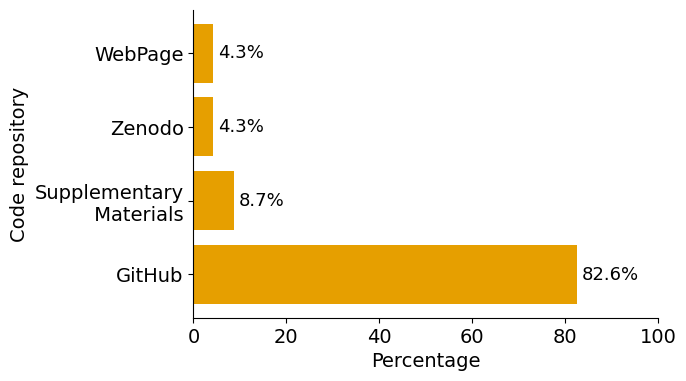

In [ ]:
fig4, ax = plt.subplots(edgecolor ='none', figsize=(6,4))
colors=["#E69F00"]
textprops = {"fontsize":14}

codeavailability = ['GitHub', 'Supplementary\n Materials', 'Zenodo', 'WebPage']
count = [19,2,1,1]
Percentage = [82.6, 8.7, 4.3, 4.3]

ax.barh(codeavailability, Percentage, color=colors) 
#ax.axis("off")
##to get horizontal barplot with percentage
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlim([0, 100])
plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Code repository", fontsize=14)

sns.despine()
#plt.savefig(r'figure4.jpg', bbox_inches='tight', dpi=600)
plt.show()

### New Figure

In [70]:
#create dataframe of counts
df_temp=pd.DataFrame({'individual counts': df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()

#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[0,'individual counts'] += df_temp.loc[5,'individual counts']
df_temp.loc[3,'individual counts'] += df_temp.loc[5,'individual counts']
df_temp = df_temp.drop(5)

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[0,'individual counts'] += df_temp.loc[13,'individual counts']
df_temp.loc[6,'individual counts'] += df_temp.loc[13,'individual counts']
df_temp = df_temp.drop(13)

#adding Website,Github to Github and Website Counts
df_temp.loc[0,'individual counts'] += df_temp.loc[14,'individual counts']
df_temp.loc[2,'individual counts'] += df_temp.loc[14,'individual counts']
df_temp = df_temp.drop(14)

#rename columns
df_temp=df_temp.rename(columns={"index":"Source","individual counts":"Counts"})

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Source,Counts,Percentage
0,GitHub,180,71.71
1,NA,17,6.77
2,Website,16,6.37
3,Zenodo,14,5.58
4,Bitbucket,6,2.39
5,Supplementary,6,2.39
6,Sourceforge,3,1.20
7,Downloadable File,2,0.80
8,GitLab,2,0.80
9,CRAN,2,0.80


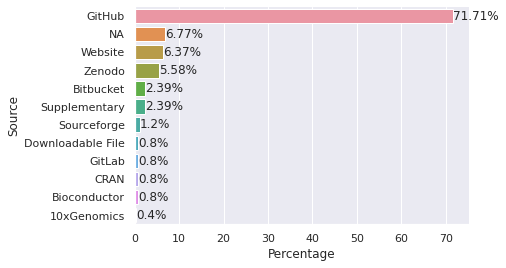

In [71]:
sns.set_context("paper")
sns.set_palette("pastel")
rcParams['font.family'] = 'sans-serif'
sns.set(font_scale=1)

sns.barplot(data=df_temp, x='Percentage',y='Source')
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='center')
sns.despine()
plt.show()


## Figure 1c

### Code and data availability statements 

#### Old Figure

In [ ]:
print(df['Code availability statement (Yes/No)'].value_counts())

no     244
yes    209
Name: Code availability statement (Yes/No), dtype: int64


In [ ]:
%%bash
 head -205 240_B.txt|cut -f 10,15|sed -e 's/upon request/no/g' |sort |uniq -c

      1 Data availability (yes/no)	Code availability (Yes/No)
     49 no	no
     13 no	yes
     81 yes	no
     61 yes	yes


In [ ]:
%%bash
 head -205 240_B.txt|cut -f 2,10,15|sed -e 's/upon request/no/g' |sort |uniq -c| grep -P "no\\tyes"

      1 2016	no	yes
      1 2017	no	yes
      2 2018	no	yes
      3 2019	no	yes
      6 2020	no	yes


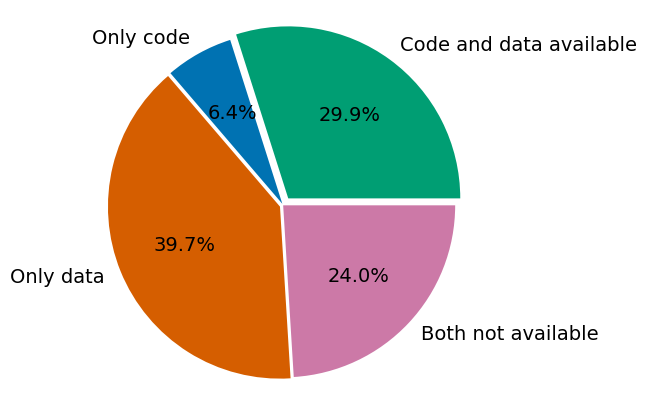

In [ ]:
labels = ['Code and data available',
'Only code',
'Only data',
'Both not available' ]
sizes = [61,13,81,49]
explode = (0.05,0.01,0.02, 0)  
colors = ['#009E73', '#0072B2','#D55E00', '#CC79A7']
textprops = {"fontsize":14}

#Plot
#plt.rcParams['font.size']=14
fig3, ax1 = plt.subplots(figsize = (5,5))
#plt.title("Code availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, startangle=360, textprops = textprops)
ax1.axis('equal')

sns.despine()
#plt.savefig(r'figure3.jpg', bbox_inches='tight', dpi=600)
plt.show()

In [77]:
print(df['Data availability statement (yes/no)'].value_counts())

TypeError: 'int' object is not callable

#### New Figure

In [9]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither Available','Only Code','Only Data','Code and Data Available']
df_temp

,Data availability (yes/no),Code availability (Yes/No),Counts,Labels
0,no,no,49,Neither Available
1,no,yes,13,Only Code
2,yes,no,81,Only Data
3,yes,yes,61,Code and Data Available


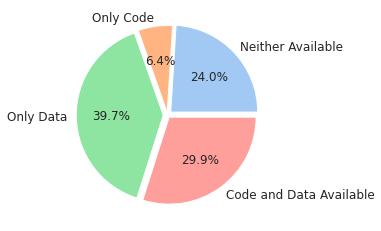

In [10]:
rcParams['font.family'] = 'sans-serif'
colors=sns.color_palette('pastel')
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":12}
plt.pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
sns.despine()
plt.show()


## Figure 1d

In [11]:
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(2)
df_code_avail

,Code availability (Yes/No),Counts,Percentage
0,no,227,50.11
1,yes,226,49.89


In [12]:
df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(2)
df_code_avail_statement

,Code availability (Yes/No),Counts,Percentage
0,no,244,53.86
1,yes,209,46.14


In [13]:
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'


df_temp

,Code availability statement (Yes/No),Code availability (Yes/No),Counts
0,Code Availability\nStatement Not Given\n(53.86%),Code Unavailable\n(50.11%),197
1,Code Availability\nStatement Not Given\n(53.86%),Code Available\n(49.89%),47
2,Code Availability\nStatement Given\n(46.14%),Code Unavailable\n(50.11%),30
3,Code Availability\nStatement Given\n(46.14%),Code Available\n(49.89%),179


<AxesSubplot:>

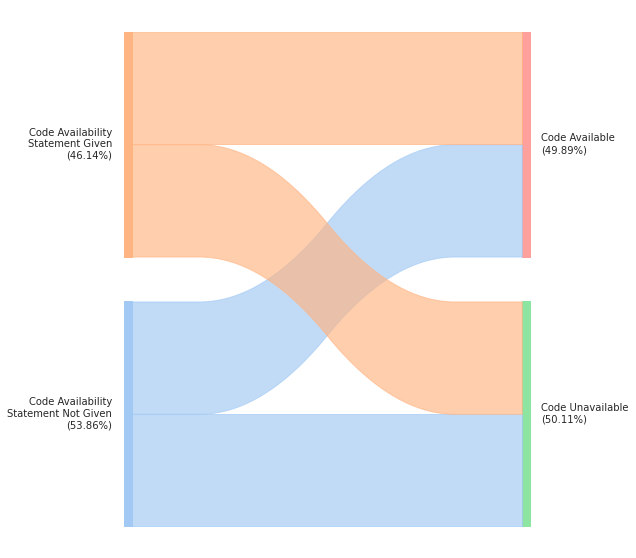

In [15]:
plt.figure(figsize=(8, 10))
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]

colors = sns.color_palette("pastel")
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Code availability statement (Yes/No)'], right=df_temp['Code availability (Yes/No)'],  aspect=20,
    fontsize=10,colorDict=color_dict
)


## Figure 1e

### Old Figure

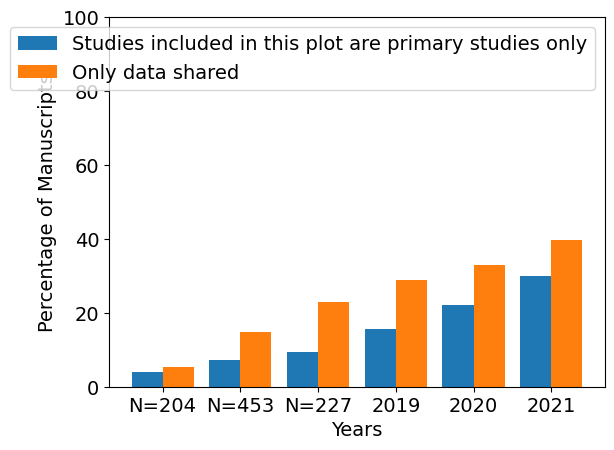

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['N=204','N=453','N=227','2019','2020','2021']
Ygirls = [3.92,7.35,9.31,15.69,22.06,29.90]
Zboys = [5.39,14.71,23.04,28.92,32.84,39.71]
  
X_axis = np.arange(len(X))
plt.rcParams["font.size"] = 14
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = 'Studies included in this plot are primary studies only')
plt.bar(X_axis + 0.2, Zboys, 0.4, label = 'Only data shared')
plt.ylim([0, 100])
plt.xticks(X_axis, X)
plt.xlabel("Years")
plt.ylabel("Percentage of Manuscripts")
plt.title("")
plt.legend()
plt.show()

Text(0, 0.5, 'Primary analysis manuscript  (%)')

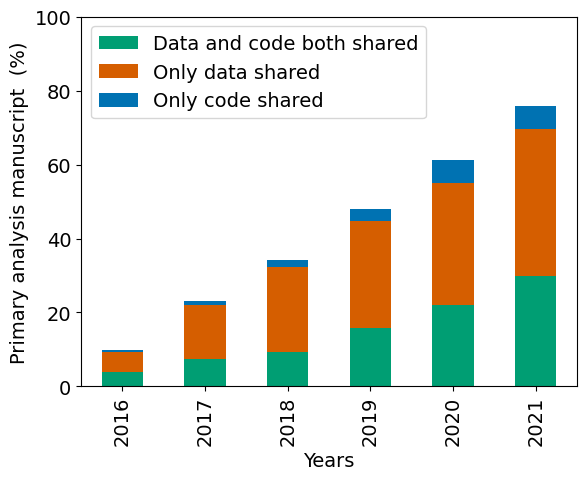

In [ ]:
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt
 
# create DataFrame
df = pd.DataFrame({'Data and code both shared': [3.92,7.35,9.31,15.69,22.06,29.90],
                   'Only data shared': [5.39,14.71,23.04,28.92,32.84,39.71],
                  'Only code shared': [0.49,0.98,1.96,3.43,6.37,6.37]},
                  index=['2016','2017','2018','2019','2020','2021'])
 
plt.rcParams["font.size"] = 14
# create stacked bar chart for monthly temperatures
df.plot(kind='bar', stacked=True, color=['#009E73','#D55E00','#0072B2'])
plt.ylim([0, 100])
# labels for x & y axis
plt.xlabel("Years")
plt.ylabel("Primary analysis manuscript  (%)")
 
# title of plot

### New Figure

In [252]:
df.columns

Index(['PMC_ID', 'PMC_Year', 'Journal', 'IF', 'Article Title', 'Type of paper',
       'Secondary analysis', 'Data availability statement (yes/no)',
       'Data availability with explaination(yes/no)',
       'Data availability (yes/no)',
       'If Data availability = yes, where do they share data? (SRA/GEO/other)',
       'If other database, specifiy which one',
       'Code availability statement (Yes/No)',
       'Code availability (Yes/No (reason))', 'Code availability (Yes/No)',
       'Reproducibility',
       'If Code availability = yes,  What kind of code do they share?',
       'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)',
       'If Code availability = yes, do they share the code as notebook or R markdown file (.Rmd)? (yes/no)',
       'If yes, notebook/Rmd', 'If yes, single/ multiple',
       'Summary data (yes/ no/ partial)', 'Number of citations',
       'Gender of the PI',
       'Experience of PI/ Last author (Check their profil

In [19]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'

#create dataframe for counts data of data availability and code availability, pmc_year, and analysis type 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no') & (df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
#Create labels column
df_temp['Labels']='Unknown'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Data and Code Both Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='no'), 'Labels'] = 'Only Data Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'no') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Only Code Shared'

df_temp

,Data availability (yes/no),Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percentage,Labels
6,no,yes,2016,no,1,0.65,Only Code Shared
7,no,yes,2017,no,1,0.65,Only Code Shared
8,no,yes,2018,no,2,1.29,Only Code Shared
9,no,yes,2019,Hybrid,2,1.29,Only Code Shared
10,no,yes,2019,no,1,0.65,Only Code Shared
11,no,yes,2020,Hybrid,1,0.65,Only Code Shared
12,no,yes,2020,no,5,3.23,Only Code Shared
13,yes,no,2016,no,11,7.10,Only Data Shared
14,yes,no,2017,no,19,12.26,Only Data Shared
15,yes,no,2018,no,17,10.97,Only Data Shared


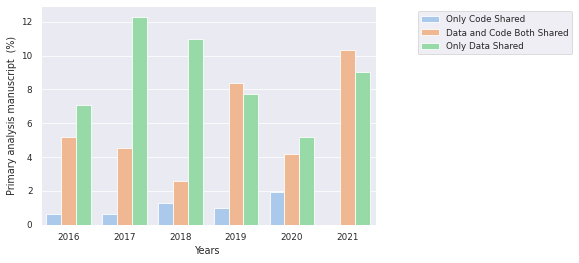

In [20]:
sns.set_palette("pastel")
sns.barplot(data=df_temp.sort_values(['PMC_Year','Percentage']), x='PMC_Year',y='Percentage',hue='Labels', ci=None)
sns.despine()
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.xlabel("Years")
plt.ylabel("Primary analysis manuscript  (%)")
plt.show()

## Figure 1f


### Old Figure

In [ ]:
%%bash
cat 240_B.txt|cut -f 2,15|sort |uniq -c|grep yes

     33 2016	yes
     28 2017	yes
     32 2018	yes
     40 2019	yes
     51 2020	yes
     42 2021	yes


   Year  Code availability  PercentageIncrease
0  2016               7.28                7.28
1  2017              13.47               13.47
2  2018              20.53               20.53
3  2019              29.36               29.36
4  2020              40.62               40.62
5  2021              49.89               49.89


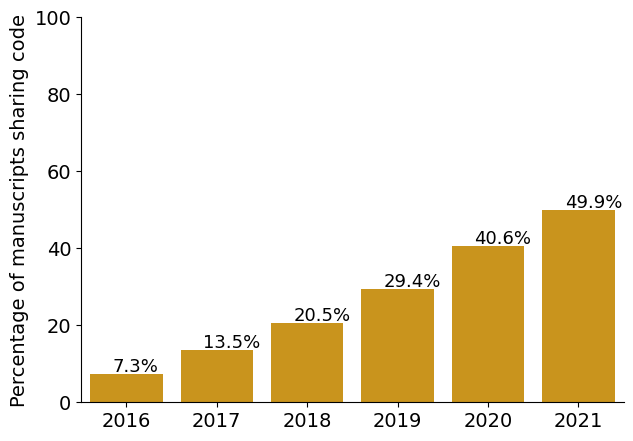

In [ ]:
data = {'Year':['2016', '2017', '2018', '2019', '2020','2021'], 
        'Code availability':[7.28,13.47,20.53,29.36,40.62,49.89], ### include number of papers with code available from each year
        'PercentageIncrease':[7.28,13.47,20.53,29.36,40.62,49.89]} ### include percentage increase in code availability each year
df4 = pd.DataFrame(data, columns=['Year','Code availability', 'PercentageIncrease'])

print(df4)

fig, ax= plt.subplots(figsize = (7,5)) 
colors = ['#E69F00']


overall = sns.barplot(data = df4, x = 'Year', y = 'PercentageIncrease', errorbar=None, palette=colors)

total = 100
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.25, i.get_height()+.6, \
            str(round((i.get_height()/total)*100, 1))+'%', fontsize=13,
                color='black')


plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.xlabel("")
plt.ylabel("Percentage of manuscripts sharing code", fontsize=14)
plt.ylim([0, 100])
#plt.title("Code availability across 2016-2020", fontsize=14)
#plt.tight_layout()
sns.despine()
#plt.savefig(r'figure5.jpg', bbox_inches='tight', dpi=600)
plt.show()

### New Figure

In [21]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability (Yes/No)','PMC_Year']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Code availability (Yes/No),PMC_Year,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,33,7.284768,7.28
1,yes,2017,28,6.181015,13.47
2,yes,2018,32,7.064018,20.53
3,yes,2019,40,8.830022,29.36
4,yes,2020,51,11.258278,40.62
5,yes,2021,42,9.271523,49.89


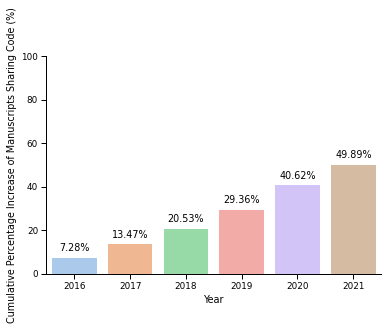

In [22]:
sns.set_palette("pastel")
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase')

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year")
plt.ylabel("Cumulative Percentage Increase of Manuscripts Sharing Code (%)")
plt.ylim([0, 100])
plt.show()

# Multipanel

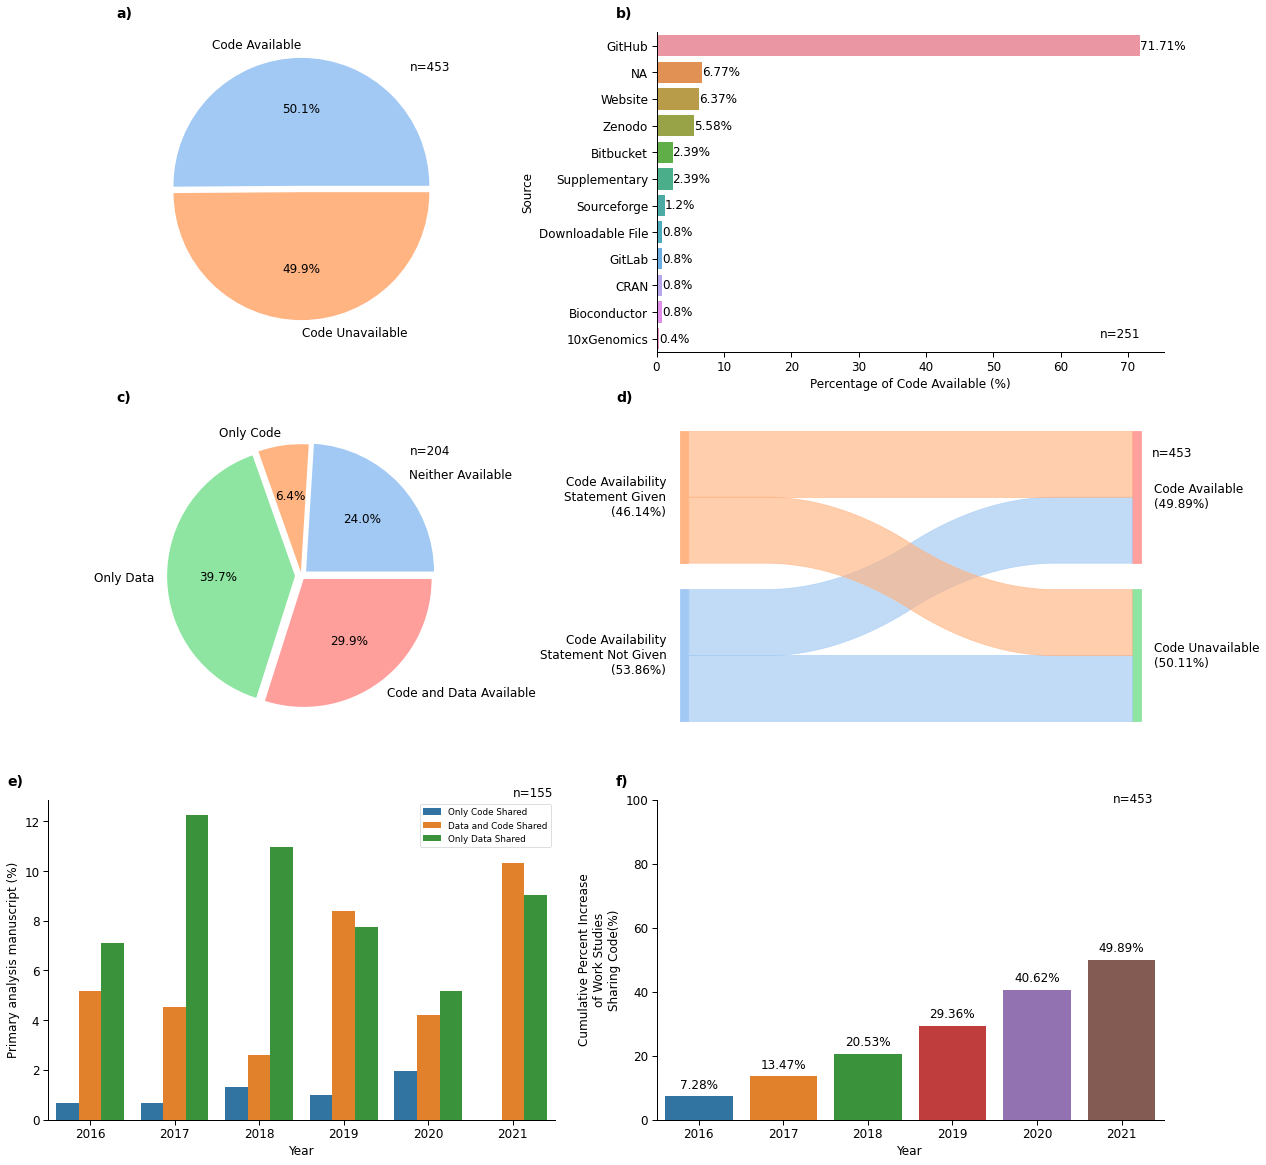

In [5]:

#sns.set_style("white")
sns.set_context("paper",font_scale=1)
#sns.color_palette("pastel")
colors=sns.color_palette('pastel')
rcParams['font.family'] = 'sans-serif'
#sns.set(font_scale=1)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3, 2,figsize=(20 ,20))

#fig 1a 
textprops = {"fontsize":12}
explode = (0.05, 0) 
ax[0,0].pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code Available','Code Unavailable'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[0,0].text(0.85, 0.95, "n=" + str(df['Code availability (Yes/No)'].value_counts().sum()), fontsize=12)

# fig 1b 
#create dataframe of counts
df_temp=pd.DataFrame({'individual counts': df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()

#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[0,'individual counts'] += df_temp.loc[5,'individual counts']
df_temp.loc[3,'individual counts'] += df_temp.loc[5,'individual counts']
df_temp = df_temp.drop(5)

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[0,'individual counts'] += df_temp.loc[13,'individual counts']
df_temp.loc[6,'individual counts'] += df_temp.loc[13,'individual counts']
df_temp = df_temp.drop(13)

#adding Website,Github to Github and Website Counts
df_temp.loc[0,'individual counts'] += df_temp.loc[14,'individual counts']
df_temp.loc[2,'individual counts'] += df_temp.loc[14,'individual counts']
df_temp = df_temp.drop(14)

#rename columns
df_temp=df_temp.rename(columns={"index":"Source","individual counts":"Counts"})

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)

sns.barplot(ax=ax[0,1],data=df_temp, x='Percentage',y='Source')
for index, row in df_temp.iterrows():
    ax[0,1].annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='center')
ax[0,1].text(65.85, 10.95, "n=" + str(df_temp['Counts'].sum()), fontsize=12)
ax[0, 1].tick_params(axis='both', labelsize=12)
ax[0, 1].set_xlabel('Percentage of Code Available (%)', fontsize=12)
ax[0, 1].set_ylabel('Source', fontsize=12)


#fig 1c 
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither Available','Only Code','Only Data','Code and Data Available']
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":12}
ax[1,0].pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[1,0].text(0.85, 0.95, "n=" + str(df_temp['Counts'].sum()), fontsize=12)


#fig 1d 
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(2)

df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(2)

#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'

category_labels = [
    'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]

colors = sns.color_palette("pastel")
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]
sankey(
    left=df_temp['Code availability statement (Yes/No)'], right=df_temp['Code availability (Yes/No)'],  aspect=20,
    fontsize=12,colorDict=color_dict, ax=ax[1,1]
)
ax[1,1].text(0.23, 4, "n=" + str(df_temp['Counts'].sum()), fontsize=12)
ax[0, 1].tick_params(axis='both', labelsize=12)

#Fig 1e 
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no') & (df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
#Create labels column
df_temp['Labels']='Unknown'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Data and Code Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='no'), 'Labels'] = 'Only Data Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'no') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Only Code Shared'
sns.barplot(ax=ax[2,0],data=df_temp.sort_values(['PMC_Year','Percentage']), x='PMC_Year',y='Percentage',hue='Labels', ci=None)
sns.despine()
ax[2,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
ax[2,0].set_xlabel("Year", fontsize=12)
ax[2,0].set_ylabel("Primary analysis manuscript (%)",fontsize=12)
ax[2,0].text(5, 13, "n=" + str(df_temp['Counts'].sum()), fontsize=12)
ax[2,0].tick_params(axis='both', labelsize=12)





#Fig 1f 
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability (Yes/No)','PMC_Year']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)

sns.barplot(ax=ax[2,1],data=df_temp, x='PMC_Year', y='Cumulative Percent Increase')

for index, row in df_temp.iterrows():
    ax[2,1].annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.ylim([0, 100])
ax[2,1].text(4.9, 99, "n=453", fontsize=12)
ax[2,1].tick_params(axis='both', labelsize=12)
ax[2,1].set_xlabel('Year', fontsize=12)
ax[2,1].set_ylabel('Cumulative Percent Increase\nof Work Studies\nSharing Code(%)', fontsize=12)



# Add labels to each subplot
labels = ['a)', 'b)', 'c)', 'd)', 'e)','f)']

for i, axes in enumerate(ax.flatten()):
    axes.text(-0.08, 1.08, labels[i], transform=axes.transAxes, fontsize=14, fontweight='bold', va='top')





#sns.despine()
plt.show()
fig.savefig('../Figures/fig1.png', format='png', dpi=300)

# Supp Figs

## Supplementary Figure 1

### Old Figure

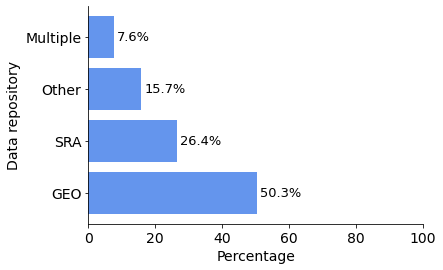

In [239]:
colors=['cornflowerblue']   
fig2, ax= plt.subplots(figsize=(6,4)) 

dataavailability = ['GEO', 'SRA', 'Other', 'Multiple']
Percentage = [50.3, 26.4,15.7,7.6]

plt.yticks(fontsize=14)
plt.xticks(fontsize=14)

ax.barh(dataavailability, Percentage, color=colors)   

plt.xlabel("Percentage", fontsize=14)
plt.ylabel("Data repository", fontsize=14)
plt.xlim([0, 100])
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.1f}'.format(width)+'%', # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center', fontsize=13)  # vertical alignment
    
sns.despine()
#plt.savefig(r'figure2.jpg', bbox_inches='tight', dpi=600)
plt.show()

### New Figure

In [6]:
#create dataframe of counts
#df_temp=pd.DataFrame({'Counts': df['If Data availability = yes, where do they share data? (SRA/GEO/other)','Secondary analysis'].value_counts()}).reset_index()
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','If Data availability = yes, where do they share data? (SRA/GEO/other)']).size()}).reset_index()
#ensure data only contains primary analysis studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

#merge hybrid row into the Other category for no 
df_temp.loc[3,'Counts'] += df_temp.loc[0,'Counts']
df_temp = df_temp.drop(0)

#adding SRA,GSE to SRA and GSE Counts
df_temp.loc[4,'Counts'] += df_temp.loc[5,'Counts']
df_temp.loc[2,'Counts'] += df_temp.loc[5,'Counts']
df_temp = df_temp.drop(5)


#adding SRA,GEO to SRA and GEO Counts
df_temp.loc[4,'Counts'] += df_temp.loc[6,'Counts']
df_temp.loc[1,'Counts'] += df_temp.loc[6,'Counts']
df_temp = df_temp.drop(6)

#adding SRA,Other to SRA and Other Counts 
df_temp.loc[4,'Counts'] += df_temp.loc[7,'Counts']
df_temp.loc[3,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(7)

#rename columns
df_temp=df_temp.rename(columns={"If Data availability = yes, where do they share data? (SRA/GEO/other)":"Data Repository"})

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort by percentage 
df_temp=df_temp.sort_values('Percentage', ascending=False)
#drop secondary analysis column 
df_temp=df_temp.drop('Secondary analysis', axis=1)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Data Repository,Counts,Percentage
0,Other,69,47.26
1,GEO,42,28.77
2,SRA,26,17.81
3,GSE,9,6.16


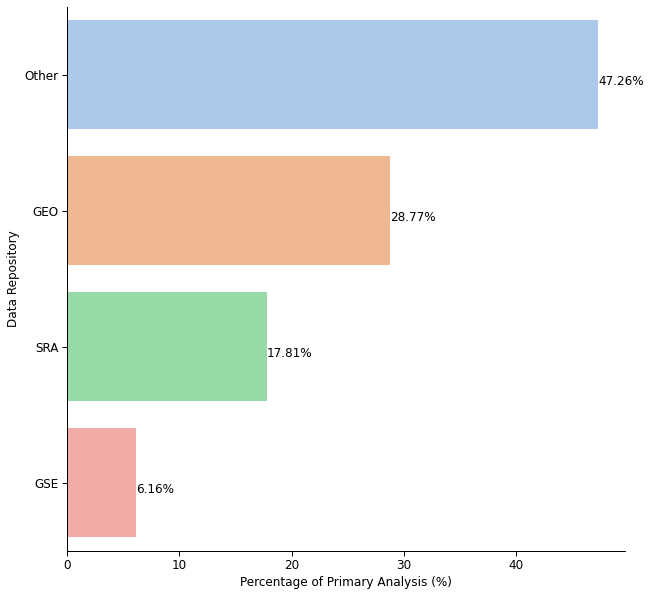

In [7]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
sns.set_palette("pastel")
sns.barplot(data=df_temp, x='Percentage',y='Data Repository')
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='top', fontsize=12)
plt.xlabel("Percentage of Primary Analysis (%)", fontsize=12)
plt.ylabel("Data Repository", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup1.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 2

In [170]:
df.columns

Index(['PMC_ID', 'PMC_Year', 'Journal', 'IF', 'Article Title', 'Type of paper',
       'Secondary analysis', 'Data availability statement (yes/no)',
       'Data availability with explaination(yes/no)',
       'Data availability (yes/no)',
       'If Data availability = yes, where do they share data? (SRA/GEO/other)',
       'If other database, specifiy which one',
       'Code availability statement (Yes/No)',
       'Code availability (Yes/No (reason))', 'Code availability (Yes/No)',
       'Reproducibility',
       'If Code availability = yes,  What kind of code do they share?',
       'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)',
       'If Code availability = yes, do they share the code as notebook or R markdown file (.Rmd)? (yes/no)',
       'If yes, notebook/Rmd', 'If yes, single/ multiple',
       'Summary data (yes/ no/ partial)', 'Number of citations',
       'Gender of the PI',
       'Experience of PI/ Last author (Check their profil

In [8]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)


#dealing with both value for Analysis column
df_temp.loc[2,'Counts'] += df_temp.loc[0,'Counts']
df_temp.loc[4,'Counts'] += df_temp.loc[0,'Counts']
df_temp = df_temp.drop(0)


df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp

,Code availability (Yes/No),Counts,Analysis,Percentage
1,no,130,Primary Analysis,28.45
2,yes,74,Primary Analysis,16.19
3,no,97,Secondary Analysis,21.23
4,yes,156,Secondary Analysis,34.14


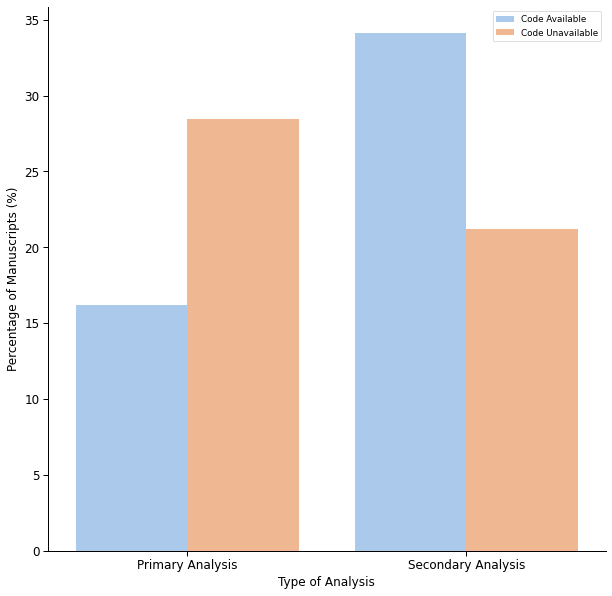

In [9]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
sns.set_palette("pastel")
sns.barplot(data=df_temp.sort_values(['Analysis','Percentage']), x='Analysis',y='Percentage',hue='Code availability (Yes/No)', ci=None)
plt.legend(['Code Available', 'Code Unavailable'],loc='upper right', bbox_to_anchor=(1., 1))
plt.xlabel("Type of Analysis",fontsize=12)
plt.ylabel("Percentage of Manuscripts (%)",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup2.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 3

In [10]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'yes', 'Data availability statement (yes/no)'] = 'Data Availability\nStatement Given'
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'no', 'Data availability statement (yes/no)'] = 'Data Availability\nStatement Not Given'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'no', 'Data availability (yes/no)'] = 'Data Unavailable'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'yes', 'Data availability (yes/no)'] = 'Data Available'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'Upon Request'
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp

,Data availability statement (yes/no),Data availability (yes/no),Counts,Percentage
0,Data Availability\nStatement Not Given,Data Unavailable,28,13.73
1,Data Availability\nStatement Not Given,Upon Request,1,0.49
2,Data Availability\nStatement Not Given,Data Available,9,4.41
3,Data Availability\nStatement Given,Data Unavailable,13,6.37
4,Data Availability\nStatement Given,Upon Request,20,9.80
5,Data Availability\nStatement Given,Data Available,133,65.20


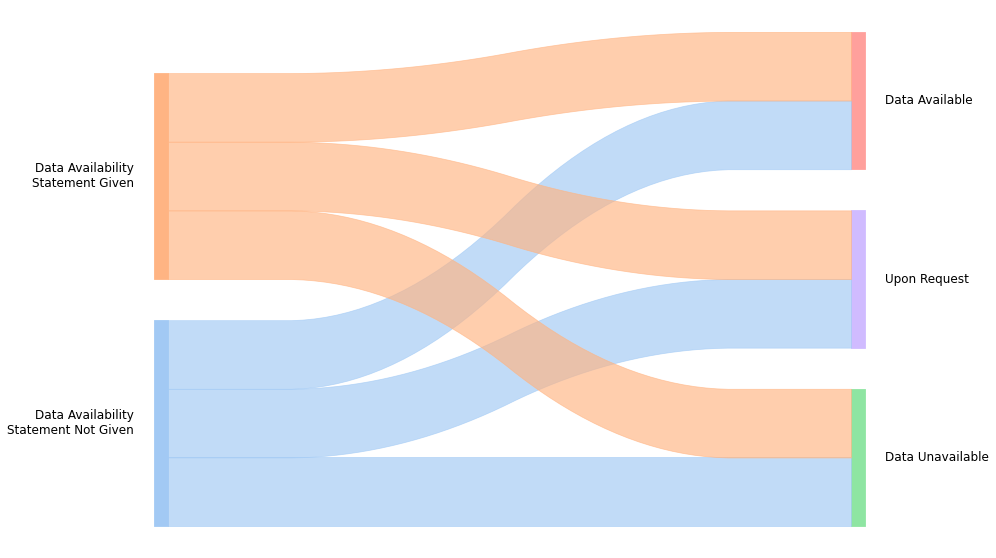

In [11]:
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Data Availability\nStatement Not Given',
    'Data Availability\nStatement Given',
    'Data Unavailable',
    'Data Available',
    'Upon Request'
]

colors = sns.color_palette("pastel")
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Data availability statement (yes/no)'], right=df_temp['Data availability (yes/no)'],  aspect=20,
    fontsize=12,colorDict=color_dict
)
plt.savefig('../Figures/sup3.png', format='png', dpi=300)


## Supplementary Figure 4

### Old Figure

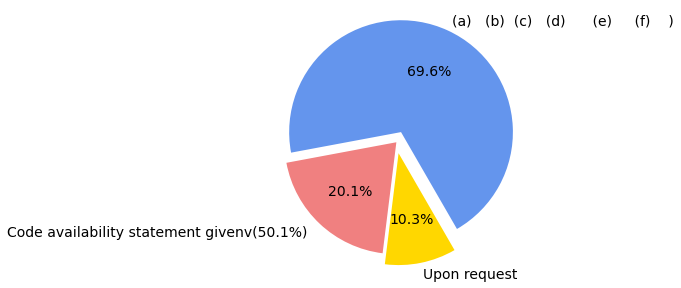

In [7]:
labels = '(a)   (b)  (c)   (d)      (e)     (f)    )', 'Code availability statement givenv(50.1%) ', 'Upon request'
sizes = [142, 41,21]
explode = (0.1, 0,0.1) 
colors = ['cornflowerblue', 'lightcoral','gold']
textprops = {"fontsize":14}

# Plot
fig1, ax1 = plt.subplots(figsize = (5,5))
#plt.title("  Data availability", fontsize=14)
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=300, textprops = textprops, colors=colors)
ax1.axis('equal')

sns.despine()
#plt.savefig(r'figure1.jpg', bbox_inches='tight', dpi=600)
plt.show()

### New Figure 

In [271]:
df.columns

Index(['PMC_ID', 'PMC_Year', 'Journal', 'IF', 'Article Title', 'Type of paper',
       'Secondary analysis', 'Data availability statement (yes/no)',
       'Data availability with explaination(yes/no)',
       'Data availability (yes/no)',
       'If Data availability = yes, where do they share data? (SRA/GEO/other)',
       'If other database, specifiy which one',
       'Code availability statement (Yes/No)',
       'Code availability (Yes/No (reason))', 'Code availability (Yes/No)',
       'Reproducibility',
       'If Code availability = yes,  What kind of code do they share?',
       'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)',
       'If Code availability = yes, do they share the code as notebook or R markdown file (.Rmd)? (yes/no)',
       'If yes, notebook/Rmd', 'If yes, single/ multiple',
       'Summary data (yes/ no/ partial)', 'Number of citations',
       'Gender of the PI',
       'Experience of PI/ Last author (Check their profil

In [12]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Code availability statement (Yes/No)','Secondary analysis']).size()}).reset_index()
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp.loc[5,'Counts'] += df_temp.loc[4,'Counts']
df_temp.loc[8,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(4)
df_temp = df_temp.drop(7)
df_temp


,Data availability statement (yes/no),Code availability statement (Yes/No),Secondary analysis,Counts
0,no,no,no,36
2,no,yes,no,2
5,yes,no,no,91
8,yes,yes,no,75


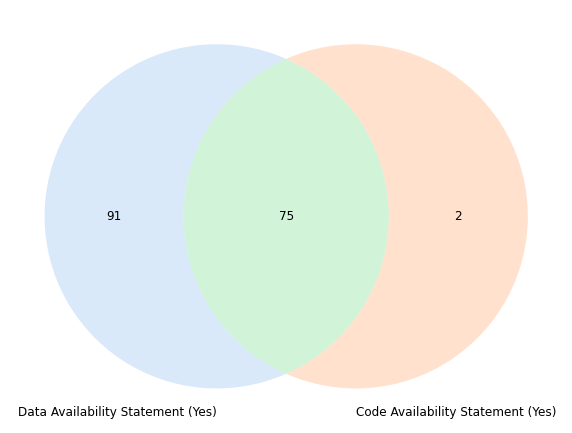

In [13]:
# Use the venn2 function
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
colors = sns.color_palette("pastel")
venn=venn2_unweighted(subsets = (df_temp['Counts'][5], df_temp['Counts'][2], df_temp['Counts'][8]), set_labels = ('Data Availability Statement (Yes)', 'Code Availability Statement (Yes)'))
venn.get_patch_by_id('10').set_facecolor(colors[0])
venn.get_patch_by_id('01').set_facecolor(colors[1])
venn.get_patch_by_id('11').set_facecolor(colors[2])
for text in venn.set_labels:
    text.set_fontsize(12)
for x in range(len(venn.subset_labels)):
    if venn.subset_labels[x] is not None:
        venn.subset_labels[x].set_fontsize(12)

plt.savefig('../Figures/sup4.png', format='png', dpi=300)
plt.show()

# Stats 

In [11]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)


#dealing with both value for Analysis column
df_temp.loc[5,'Counts'] += df_temp.loc[0,'Counts']
df_temp.loc[7,'Counts'] += df_temp.loc[1,'Counts']
df_temp = df_temp.drop(0)
df_temp = df_temp.drop(1)


df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp

,Code availability (Yes/No),Data availability (yes/no),Counts,Analysis,Percentage
2,no,no,34,Primary Analysis,16.67
3,no,upon request,15,Primary Analysis,7.35
4,no,yes,81,Primary Analysis,39.71
5,yes,no,7,Primary Analysis,3.43
6,yes,upon request,6,Primary Analysis,2.94
7,yes,yes,61,Primary Analysis,29.90
